In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import pandas_datareader.data as web

#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

Using Theano backend.


In [2]:
#print(keras.__version__)

In [3]:
def stockplotter(ticker, plot=True):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo','2018','2021')['Adj Close']
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("Housing Price Trends ")
            #plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
            plt.xlabel('Year')
            plt.ylabel('Home Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Symbols,AAPL,GOOGL,AMZN,MSFT,DAL
Date,,,,,
2018-01-02,41.442081,1073.209961,1189.010010,82.383636,53.520050
2018-01-03,41.434864,1091.520020,1204.199951,82.767044,52.529640
2018-01-04,41.627323,1095.760010,1209.589966,83.495522,52.529640
2018-01-05,42.101261,1110.290039,1229.140015,84.530701,52.793751
2018-01-08,41.944889,1114.209961,1246.869995,84.616966,51.576958
...,...,...,...,...,...
2020-12-24,131.970001,1734.160034,3172.689941,222.750000,39.730000
2020-12-28,136.690002,1773.959961,3283.959961,224.960007,40.150002
2020-12-29,134.869995,1757.760010,3322.000000,224.149994,40.029999


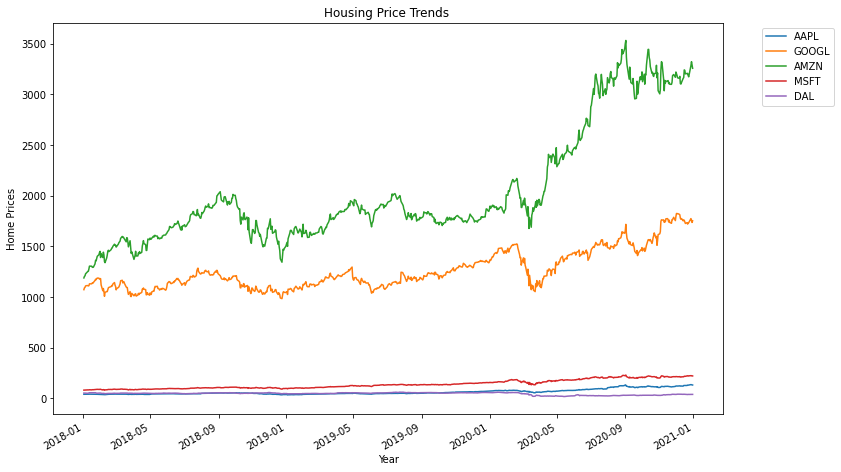

In [4]:
#df_1 = stockplotter(['XYZC'])
df_1 = stockplotter([['AAPL','GOOGL','AMZN','MSFT','DAL']], plot=True)
df_1

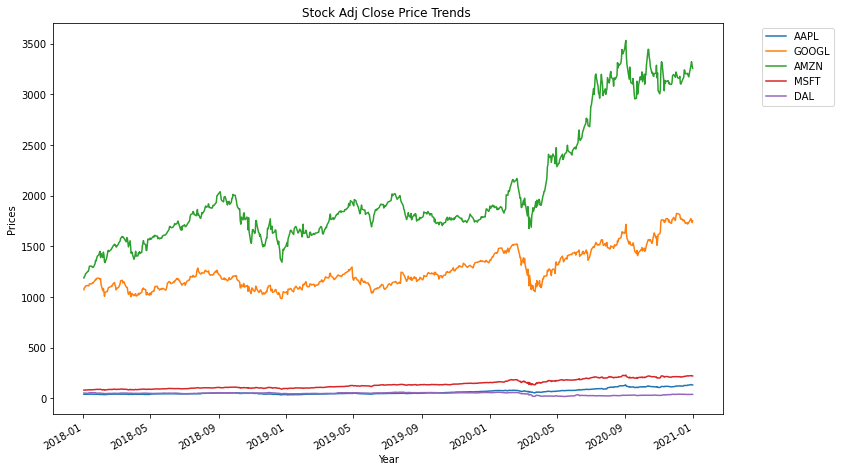

In [5]:
df_1.plot(figsize=(12,8))
plt.title("Stock Adj Close Price Trends ")
#plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
plt.xlabel('Year')
plt.ylabel('Prices')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

## **Forecasting**

In [50]:
def get_data(symbol, data_source,start,end):
    df = web.DataReader(symbol,data_source, start, end) 
    print(df.shape)
    
    plt.figure(figsize=(12,8))
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    return df

(1265, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,73.709999,71.529999,71.839996,73.550003,8233300.0,62.800835
2016-01-05,75.239998,73.629997,73.739998,74.839996,8191400.0,63.902309
2016-01-06,74.800003,73.379997,73.800003,74.080002,4921400.0,63.253376
2016-01-07,76.000000,73.489998,73.580002,73.879997,11289900.0,63.082607
2016-01-08,74.790001,71.269997,74.209999,71.379997,7749000.0,60.947964
...,...,...,...,...,...,...
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,180.369995
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,188.919998
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,191.100006


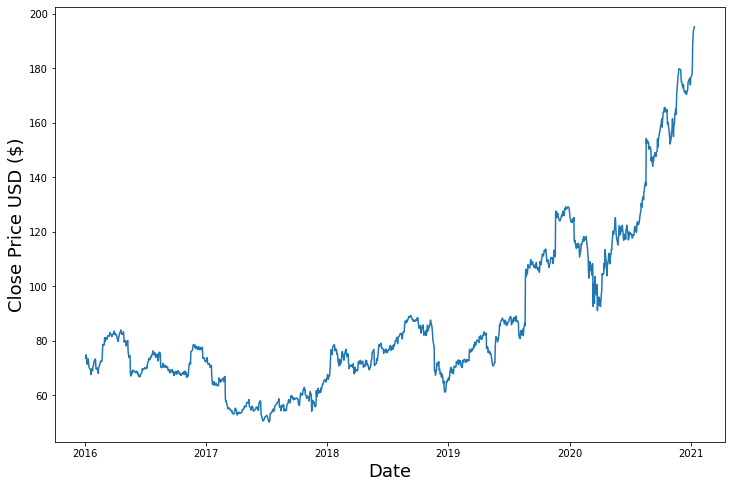

In [51]:
the_data = get_data('TGT',data_source='yahoo', start='2016-01-01',end='2021-1-11')
the_data

In [52]:
#df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

#Get the stock quote 
#df = web.DataReader('TGT', data_source='yahoo', start='2016-01-01', end='2021-1-11') 

In [53]:
#df.head()

In [54]:
#df.shape

In [55]:
# plt.figure(figsize=(12,8))
# plt.plot(df['Close'])
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)

In [56]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()

In [57]:
#dataset = df['Close']
# dataset = data.values

In [58]:
def preprocessing(df,percentage):
    training_data_len = int(np.round(len(df) * percentage))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [59]:
#training_data_len, dataset, scaler, scaled_data = preprocessing(df['Close'], percentage=.8)
training_data_len, dataset, scaler, scaled_data = preprocessing(the_data['Close'], percentage=.8)

In [60]:
#training_data_len = int(np.round(len(dataset) * .8))

In [61]:
training_data_len

1012

In [62]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = []    #dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        y_test.append(test_data[i,0])
        
    X_train, y_train = np.array(X_train), np.array(y_train)  
    X_test = np.array(X_test) #added
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) #added
    y_test = np.array(y_test)
        
    return X_train, X_test, y_train, y_test    

In [63]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [64]:
len(X_train[0])

60

In [65]:
X_train

array([[[0.16106136],
        [0.16995173],
        [0.164714  ],
        ...,
        [0.2248105 ],
        [0.22598209],
        [0.2303239 ]],

       [[0.16995173],
        [0.164714  ],
        [0.16333561],
        ...,
        [0.22598209],
        [0.2303239 ],
        [0.22122673]],

       [[0.164714  ],
        [0.16333561],
        [0.14610611],
        ...,
        [0.2303239 ],
        [0.22122673],
        [0.22453482]],

       ...,

       [[0.41619573],
        [0.42487941],
        [0.42019298],
        ...,
        [0.52301861],
        [0.51399037],
        [0.50585804]],

       [[0.42487941],
        [0.42019298],
        [0.4252929 ],
        ...,
        [0.51399037],
        [0.50585804],
        [0.50737425]],

       [[0.42019298],
        [0.4252929 ],
        [0.42736046],
        ...,
        [0.50585804],
        [0.50737425],
        [0.50461752]]])

In [66]:
X_train.shape

(952, 60, 1)

In [67]:

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)               

In [69]:
#train the model
#model checkpoint save_weights_only=True
#fresh_model.load_weights  load_model
#model.save(), load_model('')
model.fit(X_train,y_train, epochs=50, batch_size=32 ) 

Epoch 1/50
952/952 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 2/50
952/952 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 3/50
952/952 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 4/50
952/952 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 5/50
952/952 [==============================] - 3s 4ms/step - loss: 9.8513e-04
Epoch 6/50
952/952 [==============================] - 3s 4ms/step - loss: 9.3939e-04
Epoch 7/50
952/952 [==============================] - 3s 4ms/step - loss: 9.0387e-04
Epoch 8/50
952/952 [==============================] - 3s 4ms/step - loss: 8.6748e-04
Epoch 9/50
952/952 [==============================] - 4s 4ms/step - loss: 7.9723e-04
Epoch 10/50
952/952 [==============================] - 3s 4ms/step - loss: 7.3242e-04
Epoch 11/50
952/952 [==============================] - 3s 4ms/step - loss: 7.4993e-04
Epoch 12/50
952/952 [==============================] - 5s 5ms/step - loss: 6.77

In [70]:
pwd

'/Users/davidtorres/Flatiron_041320/Model_5/dsc-capstone-project-v2-onl01-dtsc-pt-041320'

In [71]:
model.save('model_parameters')

In [72]:

from keras.models import load_model

In [73]:
import keras

In [74]:
model_params = keras.models.load_model('model_parameters')
#model1 = load_model(model_params)

# summarize model.
model_params.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)               

In [75]:
#convert data to a numpy array
#X_test = np.array(X_test)

In [76]:
X_test.shape

(253, 60, 1)

In [77]:
#number of rows, number of timeseteps, number of features
#X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [78]:
X_test.shape

(253, 60, 1)

In [79]:
#get models predicted price values for X_test dataset
#want predcitions to contain same values as y_test dataset once we inverse_transform
#getting predcitiosn off of X_test
predictions = model.predict(X_test)
prediction_unscaled = scaler.inverse_transform(predictions) #unscaling the values

In [80]:
#predictions_y = model.predict(X_test)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1)) #unscaling the values

In [81]:
y_test

array([0.51378362, 0.50785667, 0.51743627, 0.46051   , 0.45582357,
       0.45995864, 0.44011028, 0.43914543, 0.45037904, 0.44203997,
       0.45210199, 0.44975881, 0.44169536, 0.44445209, 0.41736732,
       0.42956583, 0.43466575, 0.45037904, 0.44769125, 0.4509304 ,
       0.46037218, 0.45837356, 0.4681599 , 0.46933149, 0.45796001,
       0.4662302 , 0.46319779, 0.46919368, 0.46057893, 0.4383184 ,
       0.42412131, 0.41681602, 0.38208134, 0.36402481, 0.4057891 ,
       0.3835975 , 0.39724328, 0.38449346, 0.3843556 , 0.37112336,
       0.40075811, 0.38180567, 0.29248796, 0.35037903, 0.30055135,
       0.36836663, 0.36278429, 0.34679532, 0.32543075, 0.32053758,
       0.34720881, 0.2815989 , 0.31626464, 0.30709854, 0.31585115,
       0.29490008, 0.31075118, 0.30447967, 0.29214335, 0.32618885,
       0.3313577 , 0.37525843, 0.37229495, 0.37560304, 0.40110267,
       0.38635423, 0.40744317, 0.43583734, 0.40523779, 0.39090284,
       0.39048929, 0.36995176, 0.39724328, 0.41144037, 0.42605

In [82]:
len(predictions)

253

In [83]:
predictions

array([[0.4876453 ],
       [0.48951107],
       [0.49215046],
       [0.49624896],
       [0.48856914],
       [0.4732706 ],
       [0.4585772 ],
       [0.4445014 ],
       [0.4335666 ],
       [0.4294384 ],
       [0.42889267],
       [0.43211633],
       [0.43637505],
       [0.43826458],
       [0.43849447],
       [0.43226722],
       [0.42548496],
       [0.4216814 ],
       [0.4239803 ],
       [0.4289863 ],
       [0.43448797],
       [0.44064954],
       [0.44540715],
       [0.44999263],
       [0.4538202 ],
       [0.45385143],
       [0.45293918],
       [0.4514236 ],
       [0.45111924],
       [0.45000005],
       [0.44378605],
       [0.43260103],
       [0.41966823],
       [0.4020437 ],
       [0.38156146],
       [0.3726413 ],
       [0.37000698],
       [0.3735205 ],
       [0.37732407],
       [0.37971318],
       [0.37798518],
       [0.37993306],
       [0.3808397 ],
       [0.36219442],
       [0.34513712],
       [0.32588506],
       [0.32214838],
       [0.329

In [84]:
#evaluate model w/RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.02313540638657751

In [85]:
#this is in dollars
rmse_predictions = np.sqrt(np.mean(prediction_unscaled -y_test_unscaled)**2)
rmse_predictions

3.3569484303591275

In [86]:
from sklearn import metrics

In [87]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.03482377620048251


In [88]:
predictions = pd.DataFrame(prediction_unscaled, columns=['Predictions'])

In [89]:
train = dataset[:training_data_len]
valid = dataset[training_data_len:] #data from index training_data_len to 

In [90]:
len(predictions), len(valid)

(253, 253)

In [91]:
valid.reset_index(inplace=True)

In [92]:
valid.head()

,Date,Close
0,2020-01-10,124.730003
1,2020-01-13,123.870003
2,2020-01-14,125.260002
3,2020-01-15,117.000000
4,2020-01-16,116.320000


In [93]:
predictions.head()

,Predictions
0,120.937332
1,121.208054
2,121.591034
3,122.185722
4,121.071381


In [94]:
valid['Prediction'] = predictions['Predictions']

In [95]:
valid1 = valid.set_index('Date')

In [96]:
valid1.tail()

,Close,Prediction
Date,,
2021-01-05,180.369995,171.450745
2021-01-06,188.919998,172.634094
2021-01-07,191.100006,175.880798
2021-01-08,193.600006,180.025101
2021-01-11,195.279999,184.010406


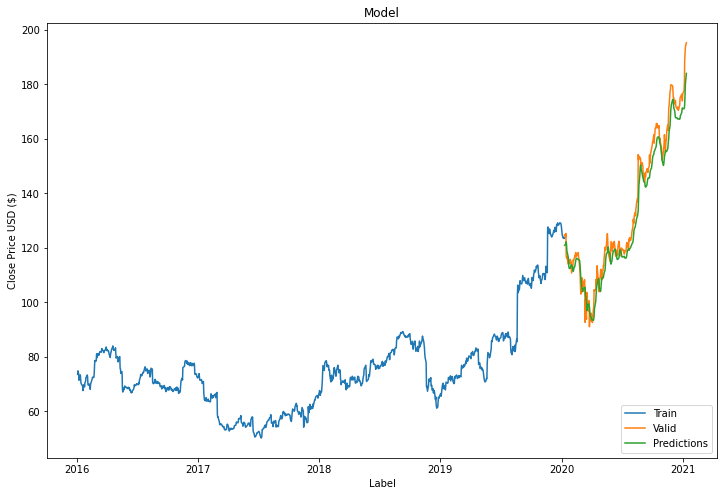

In [97]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be
"""

# train = dataset[:training_data_len]
# valid = dataset[training_data_len:] #data from index training_data_len to 
# valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Label')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
#plt.plot(valid[['Close','Predictions']])
plt.plot(valid1['Close'])
plt.plot(valid1['Prediction'])
# #valid[['Close','Predictions']].plot()
plt.legend(['Train','Valid','Predictions'],loc='lower right')

In [98]:
dataset.tail()

,Close
Date,
2021-01-05,180.369995
2021-01-06,188.919998
2021-01-07,191.100006
2021-01-08,193.600006
2021-01-11,195.279999


In [99]:
"""
predict closing price fo apple stock for 12/18/2019

get the quote
"""
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #realreate empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predcited scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price                    

In [100]:
get_quote(dataset)

array([[187.15547]], dtype=float32)